# Data Analysis Project: Bike Sharing Dataset
- Nama: M. Faridzi A.R. Lubis
- Email: rezilubis212@gmail.com
- Id Dicoding: rezilubis

## Dataset Attribute Information

- instant: record index
- dteday: date
- season: season (1:springer, 2:summer, 3:fall, 4:winter)
- yr: year (0:2011, 1:2012)
- mnth: month ( 1 to 12)
- hr: hour (0 to 23)
- holiday: weather day is holiday or not (extracted from [Web L-ink])
- weekday: day of the week
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist-, Snow + Fog
- temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Business Questions

- Bagaimana perbandingan antara pengguna casual dan pengguna yang terdaftar pada bike sharing?
- Bagaimana perbandingan penggunaan bike sharing pada hari libur dan hari kerja?
- Pada waktu jam berapakah penggunaan bike sharing paling tinggi dan paling rendah?
- Bagaimana perbandingan penggunaan bike sharing pada 4 musim yang berbeda?
- Bagaimana perbandingan penggunaan bike sharing pada 4 tipe cuaca yang berbeda?

## Preparing Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('Import Successful')

Import Successful


## Data Wrangling

### Gathering Data

- Gathering day Data

In [2]:
day_df = pd.read_csv("dataset/day.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Gathering hour Data

In [3]:
hour_df = pd.read_csv("dataset/hour.csv")

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Assessing day_df Data

- Mengecek tipe data dan inaccurate value pada data day_df

In [4]:
day_df.info()

day_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


- Mengecek missing value pada data day_df

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Mengecek duplicated value pada data day_df

In [6]:
day_df.duplicated().sum()

0

##### Findings
- Tidak terdapat missing value, duplicated value, maupun inaccurate value pada data day_df
- Kita tidak memerlukan kolom temp, atemp, hum, dan windspeed untuk menjawab pertanyaan analisis -> drop kolom tersebut saat cleaning
- Kolom instant, dteday, yr, mnth, weathersit, dan cnt sulit untuk dibaca -> rename kolom tersebut saat cleaning
- Kolom season, year, month, holiday, weekday, workingday, dan weather masih berbentuk int -> ubah menjadi data tipe kategorikal saat cleaning
- Value dari kolom season, year, holiday, weekday, workingday, dan weather masih dalam format yang sulit dipahami -> sesuaikan saat cleaning
- Kolom dateday masih berbentuk objek -> ubah menjadi data tipe datetime saat cleaning

#### Assessing hour_df Data

- Mengecek tipe data dan inaccurate value pada data hour_df

In [7]:
hour_df.info()

hour_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


- Mengecek missing value pada data hour_df

In [8]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Mengecek duplicated value pada data hour_df

In [9]:
hour_df.duplicated().sum()

0

##### Findings
- Tidak terdapat missing value, duplicated value, maupun inaccurate value pada data hour_df
- Kita tidak memerlukan kolom temp, atemp, hum, dan windspeed untuk menjawab pertanyaan analisis -> drop kolom tersebut saat cleaning
- Kolom instant, dteday, yr, mnth, hr, weathersit, dan cnt sulit untuk dibaca -> rename kolom tersebut saat cleaning
- Kolom season, year, month, hour, holiday, weekday, workingday, dan weather masih berbentuk int -> ubah menjadi data tipe kategorikal saat cleaning
- Value dari kolom season, year, hour, holiday, weekday, workingday, dan weather masih dalam format yang sulit dipahami -> sesuaikan saat
  cleaning
- Kolom dateday masih berbentuk objek -> ubah menjadi data tipe datetime saat cleaning

### Cleaning Data

#### Cleaning day_df Data

- Drop kolom temp, atemp, hum, dan windspeed

In [10]:
day_df.drop(columns=['temp', 'atemp', 'hum', 'windspeed'], inplace=True)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


- Rename kolom instant, dteday, yr, mnth, weathersit, dan cnt

In [11]:
day_df.rename(columns={'instant':'rec_id', 'dteday':'dateday', 'yr':'year', 'mnth':'month', 'weathersit':'weather', 'cnt':'total'}, inplace=True)

day_df.head()

,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


- Mengubah tipe data kolom season, year, month, holiday, weekday, workingday, dan weathersit menjadi kategorikal

In [12]:
for col in ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']:
    day_df[col] = day_df[col].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   rec_id      731 non-null    int64   
 1   dateday     731 non-null    object  
 2   season      731 non-null    category
 3   year        731 non-null    category
 4   month       731 non-null    category
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weather     731 non-null    category
 9   casual      731 non-null    int64   
 10  registered  731 non-null    int64   
 11  total       731 non-null    int64   
dtypes: category(7), int64(4), object(1)
memory usage: 35.1+ KB


- Mengubah value dari kolom season agar lebih sesuai

In [13]:
day_df['season'] = day_df['season'].replace({
    1:'springer',
    2:'summer',
    3:'fall',
    4:'winter'
})

day_df.head()

,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,1,82,1518,1600


- Mengubah value dari kolom year agar lebih sesuai

In [14]:
day_df['year'] = day_df['year'].replace({
    0:2011,
    1:2012
})

day_df.head()

,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,0,6,0,2,331,654,985
1,2,2011-01-02,springer,2011,1,0,0,0,2,131,670,801
2,3,2011-01-03,springer,2011,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,springer,2011,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,springer,2011,1,0,3,1,1,82,1518,1600


- Mengubah value dari kolom holiday agar lebih sesuai

In [15]:
day_df['holiday'] = day_df['holiday'].replace({
    0:'Not Holiday',
    1:'Holiday'
})

day_df.head()

,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,Not Holiday,6,0,2,331,654,985
1,2,2011-01-02,springer,2011,1,Not Holiday,0,0,2,131,670,801
2,3,2011-01-03,springer,2011,1,Not Holiday,1,1,1,120,1229,1349
3,4,2011-01-04,springer,2011,1,Not Holiday,2,1,1,108,1454,1562
4,5,2011-01-05,springer,2011,1,Not Holiday,3,1,1,82,1518,1600


- Mengubah value dari kolom weekday agar lebih sesuai

In [16]:
day_df['weekday'] = day_df['weekday'].replace({
    0:'Sunday',
    1:'Monday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',
    6:'Saturday'
})

day_df.head()

,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,Not Holiday,Saturday,0,2,331,654,985
1,2,2011-01-02,springer,2011,1,Not Holiday,Sunday,0,2,131,670,801
2,3,2011-01-03,springer,2011,1,Not Holiday,Monday,1,1,120,1229,1349
3,4,2011-01-04,springer,2011,1,Not Holiday,Tuesday,1,1,108,1454,1562
4,5,2011-01-05,springer,2011,1,Not Holiday,Wednesday,1,1,82,1518,1600


- Mengubah value dari kolom workingday agar lebih sesuai

In [17]:
day_df['workingday'] = day_df['workingday'].replace({
    0:'Offday',
    1:'Workday'
})

day_df.head()

,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,Not Holiday,Saturday,Offday,2,331,654,985
1,2,2011-01-02,springer,2011,1,Not Holiday,Sunday,Offday,2,131,670,801
2,3,2011-01-03,springer,2011,1,Not Holiday,Monday,Workday,1,120,1229,1349
3,4,2011-01-04,springer,2011,1,Not Holiday,Tuesday,Workday,1,108,1454,1562
4,5,2011-01-05,springer,2011,1,Not Holiday,Wednesday,Workday,1,82,1518,1600


- Mengubah value dari kolom weather agar lebih sesuai

In [18]:
day_df['weather'] = day_df['weather'].replace({
    1:'Clear & Partly Cloudy',
    2:'Mist & Cloudy',
    3:'Light Snow & Light Rain',
    4:'Heavy rain & Ice Pallets'
})

day_df.head()

,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,Not Holiday,Saturday,Offday,Mist & Cloudy,331,654,985
1,2,2011-01-02,springer,2011,1,Not Holiday,Sunday,Offday,Mist & Cloudy,131,670,801
2,3,2011-01-03,springer,2011,1,Not Holiday,Monday,Workday,Clear & Partly Cloudy,120,1229,1349
3,4,2011-01-04,springer,2011,1,Not Holiday,Tuesday,Workday,Clear & Partly Cloudy,108,1454,1562
4,5,2011-01-05,springer,2011,1,Not Holiday,Wednesday,Workday,Clear & Partly Cloudy,82,1518,1600


- Mengubah kolom dateday menjadi tipe data datetime

In [19]:
day_df['dateday'] = day_df['dateday'].astype('datetime64[ns]')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rec_id      731 non-null    int64         
 1   dateday     731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weather     731 non-null    category      
 9   casual      731 non-null    int64         
 10  registered  731 non-null    int64         
 11  total       731 non-null    int64         
dtypes: category(7), datetime64[ns](1), int64(4)
memory usage: 35.1 KB


#### Cleaning hour_df Data

- Drop kolom temp, atemp, hum, dan windspeed

In [20]:
hour_df.drop(columns=['temp', 'atemp', 'hum', 'windspeed'], inplace=True)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


- Rename kolom instant, dteday, yr, mnth, hr, weathersit, dan cnt

In [21]:
hour_df.rename(columns={'instant':'rec_id', 'dteday':'dateday', 'yr':'year', 'mnth':'month', 'hr':'hour', 'weathersit':'weather', 'cnt':'total'}, inplace=True)

hour_df.head()

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


- Mengubah tipe data kolom season, year, month, holiday, weekday, workingday, dan weathersit menjadi kategorikal

In [22]:
for col2 in ['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']:
    hour_df[col2] = hour_df[col2].astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   rec_id      17379 non-null  int64   
 1   dateday     17379 non-null  object  
 2   season      17379 non-null  category
 3   year        17379 non-null  category
 4   month       17379 non-null  category
 5   hour        17379 non-null  category
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weather     17379 non-null  category
 10  casual      17379 non-null  int64   
 11  registered  17379 non-null  int64   
 12  total       17379 non-null  int64   
dtypes: category(8), int64(4), object(1)
memory usage: 817.0+ KB


- Mengubah value dari kolom season agar lebih sesuai

In [23]:
hour_df['season'] = hour_df['season'].replace({
    1:'springer',
    2:'summer',
    3:'fall',
    4:'winter'
})

hour_df.head()

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,0,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,springer,0,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,springer,0,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,springer,0,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,springer,0,1,4,0,6,0,1,0,1,1


- Mengubah value dari kolom year agar lebih sesuai

In [24]:
hour_df['year'] = hour_df['year'].replace({
    0:2011,
    1:2012
})

hour_df.head()

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,springer,2011,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,springer,2011,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,springer,2011,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,springer,2011,1,4,0,6,0,1,0,1,1


- Mengubah value dari kolom hour agar lebih sesuai

In [25]:
hour_df['hour'] = hour_df['hour'].replace({
    0:'12 am',
    1:'01 am',
    2:'02 am',
    3:'03 am',
    4:'04 am',
    5:'05 am',
    6:'06 am',
    7:'07 am',
    8:'08 am',
    9:'09 am',
    10:'10 am',
    11:'11 am',
    12:'12 pm',
    13:'01 pm',
    14:'02 pm',
    15:'03 pm',
    16:'04 pm',
    17:'05 pm',
    18:'06 pm',
    19:'07 pm',
    20:'08 pm',
    21:'09 pm',
    22:'10 pm',
    23:'11 pm',
})

hour_df.head()

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,12 am,0,6,0,1,3,13,16
1,2,2011-01-01,springer,2011,1,01 am,0,6,0,1,8,32,40
2,3,2011-01-01,springer,2011,1,02 am,0,6,0,1,5,27,32
3,4,2011-01-01,springer,2011,1,03 am,0,6,0,1,3,10,13
4,5,2011-01-01,springer,2011,1,04 am,0,6,0,1,0,1,1


- Mengubah value dari kolom holiday agar lebih sesuai

In [26]:
hour_df['holiday'] = hour_df['holiday'].replace({
    0:'Not Holiday',
    1:'Holiday'
})

hour_df.head()

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,12 am,Not Holiday,6,0,1,3,13,16
1,2,2011-01-01,springer,2011,1,01 am,Not Holiday,6,0,1,8,32,40
2,3,2011-01-01,springer,2011,1,02 am,Not Holiday,6,0,1,5,27,32
3,4,2011-01-01,springer,2011,1,03 am,Not Holiday,6,0,1,3,10,13
4,5,2011-01-01,springer,2011,1,04 am,Not Holiday,6,0,1,0,1,1


- Mengubah value dari kolom weekday agar lebih sesuai

In [27]:
hour_df['weekday'] = hour_df['weekday'].replace({
    0:'Sunday',
    1:'Monday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',
    6:'Saturday'
})

hour_df.head()

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,12 am,Not Holiday,Saturday,0,1,3,13,16
1,2,2011-01-01,springer,2011,1,01 am,Not Holiday,Saturday,0,1,8,32,40
2,3,2011-01-01,springer,2011,1,02 am,Not Holiday,Saturday,0,1,5,27,32
3,4,2011-01-01,springer,2011,1,03 am,Not Holiday,Saturday,0,1,3,10,13
4,5,2011-01-01,springer,2011,1,04 am,Not Holiday,Saturday,0,1,0,1,1


- Mengubah value dari kolom workingday agar lebih sesuai

In [28]:
hour_df['workingday'] = hour_df['workingday'].replace({
    0:'Offday',
    1:'Workday'
})

hour_df.head()

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,12 am,Not Holiday,Saturday,Offday,1,3,13,16
1,2,2011-01-01,springer,2011,1,01 am,Not Holiday,Saturday,Offday,1,8,32,40
2,3,2011-01-01,springer,2011,1,02 am,Not Holiday,Saturday,Offday,1,5,27,32
3,4,2011-01-01,springer,2011,1,03 am,Not Holiday,Saturday,Offday,1,3,10,13
4,5,2011-01-01,springer,2011,1,04 am,Not Holiday,Saturday,Offday,1,0,1,1


- Mengubah value dari kolom weather agar lebih sesuai

In [29]:
hour_df['weather'] = hour_df['weather'].replace({
    1:'Clear & Partly Cloudy',
    2:'Mist & Cloudy',
    3:'Light Snow & Light Rain',
    4:'Heavy rain & Ice Pallets'
})

hour_df.head()

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,12 am,Not Holiday,Saturday,Offday,Clear & Partly Cloudy,3,13,16
1,2,2011-01-01,springer,2011,1,01 am,Not Holiday,Saturday,Offday,Clear & Partly Cloudy,8,32,40
2,3,2011-01-01,springer,2011,1,02 am,Not Holiday,Saturday,Offday,Clear & Partly Cloudy,5,27,32
3,4,2011-01-01,springer,2011,1,03 am,Not Holiday,Saturday,Offday,Clear & Partly Cloudy,3,10,13
4,5,2011-01-01,springer,2011,1,04 am,Not Holiday,Saturday,Offday,Clear & Partly Cloudy,0,1,1


- Mengubah kolom dateday menjadi tipe data datetime

In [30]:
hour_df['dateday'] = hour_df['dateday'].astype('datetime64[ns]')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rec_id      17379 non-null  int64         
 1   dateday     17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17379 non-null  category      
 10  casual      17379 non-null  int64         
 11  registered  17379 non-null  int64         
 12  total       17379 non-null  int64         
dtypes: category(8), datetime64[ns](1), int64(4)
memory usage: 817.0 KB


## Exploratory Data Analysis (EDA)
##### Kita hanya akan menggunakan hour_df dikarenakan atribut hour_df lebih lengkap dan kedua dataframe memberikan value yang sama dengan atribut yang sama

### Descriptive Analytics

In [31]:
hour_df.describe(include='all')

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
count,17379.0000,17379,17379,17379.0,17379.0,17379,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2.0,12.0,24,2,7,2,4,NaN,NaN,NaN
top,NaN,NaN,fall,2012.0,5.0,05 pm,Not Holiday,Saturday,Workday,Clear & Partly Cloudy,NaN,NaN,NaN
freq,NaN,NaN,4496,8734.0,1488.0,730,16879,2512,11865,11413,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,367.000000,886.000000,977.000000


##### Findings
- Dapat dilihat bahwa rata-rata pengguna yang terdaftar atau registered lebih banyak jika dibandingkan dengan pengguna casual

### Comparing Registered, Casual, and Total Consumers by Different Categories

- By season

In [32]:
sea_hour_df = hour_df.groupby(by='season').agg({
    'registered':'sum',
    'casual':'sum',
    'total':'sum'
}).sort_values(by='total', ascending=False)

sea_hour_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12704\359269222.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sea_hour_df = hour_df.groupby(by='season').agg({


,registered,casual,total
season,,,
fall,835038,226091,1061129
summer,715067,203522,918589
winter,711831,129782,841613
springer,410726,60622,471348


- By year

In [33]:
hour_df.groupby(by='year').agg({
    'registered':'sum',
    'casual':'sum',
    'total':'sum'
}).sort_values(by='total', ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12704\752219798.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='year').agg({


,registered,casual,total
year,,,
2012,1676811,372765,2049576
2011,995851,247252,1243103


- By month

In [34]:
hour_df.groupby(by='month').agg({
    'registered':'sum',
    'casual':'sum',
    'total':'sum'
}).sort_values(by='total', ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12704\1656083680.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='month').agg({


,registered,casual,total
month,,,
8,279155,72039,351194
6,272436,73906,346342
9,275668,70323,345991
7,266791,78157,344948
5,256401,75285,331686
10,262592,59760,322352
4,208292,60802,269094
11,218228,36603,254831
3,184476,44444,228920


- By hour

In [35]:
hr_hour_df = hour_df.groupby(by='hour').agg({
    'registered':'sum',
    'casual':'sum',
    'total':'sum'
}).sort_values(by='total', ascending=False)

hr_hour_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12704\797999822.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hr_hour_df = hour_df.groupby(by='hour').agg({


,registered,casual,total
hour,,,
05 pm,282640,54220,336860
06 pm,265276,44496,309772
08 am,245240,15761,261001
04 pm,173914,53834,227748
07 pm,191284,35505,226789
01 pm,132206,52713,184919
12 pm,134696,49718,184414
03 pm,128543,54606,183149
02 pm,120563,55089,175652


- By holiday

In [36]:
hour_df.groupby(by='holiday').agg({
    'registered':'sum',
    'casual':'sum',
    'total':'sum'
}).sort_values(by='total', ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12704\938953889.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='holiday').agg({


,registered,casual,total
holiday,,,
Not Holiday,2616586,597658,3214244
Holiday,56076,22359,78435


- By weekday

In [37]:
hour_df.groupby(by='weekday').agg({
    'registered':'sum',
    'casual':'sum',
    'total':'sum'
}).sort_values(by='total', ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12704\3920623842.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='weekday').agg({


,registered,casual,total
weekday,,,
Friday,409552,78238,487790
Thursday,423935,61460,485395
Saturday,323955,153852,477807
Wednesday,415729,57319,473048
Tuesday,411266,57843,469109
Monday,384719,70784,455503
Sunday,303506,140521,444027


- By workingday

In [38]:
wd_hour_df = hour_df.groupby(by='workingday').agg({
    'registered':'sum',
    'casual':'sum',
    'total':'sum'
}).sort_values(by='total', ascending=False)

wd_hour_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12704\3105468525.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wd_hour_df = hour_df.groupby(by='workingday').agg({


,registered,casual,total
workingday,,,
Workday,1989125,303285,2292410
Offday,683537,316732,1000269


- By weather

In [39]:
weat_hour_df = hour_df.groupby(by='weather').agg({
    'registered':'sum',
    'casual':'sum',
    'total':'sum'
}).sort_values(by='total', ascending=False)

weat_hour_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12704\1585599565.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weat_hour_df = hour_df.groupby(by='weather').agg({


,registered,casual,total
weather,,,
Clear & Partly Cloudy,1875428,462745,2338173
Mist & Cloudy,661471,134481,795952
Light Snow & Light Rain,135548,22783,158331
Heavy rain & Ice Pallets,215,8,223


##### Findings
- Fall season merupakan season dengan pengguna Bike Sharing terbanyak, sedangkan springer merupakan season dengan pengguna Bike Sharing tersedikit
- Terdapat peningkatan penggunaan Bike Sharing dari tahun 2011 - 2012
- Bulan ke-8 merupakan bulan dengan pengguna Bike Sharing terbanyak, sedangkan bulan ke-1 merupakan bulan dengan pengguna Bike Sharing tersedikit
- Jam 05 pm merupakan waktu dengan pengguna Bike Sharing terbanyak, sedangkan jam 04 am merupakan waktu dengan pengguna Bike Sharing tersedikit
- Terdapat lebih banyak pengguna Bike Sharing pada saat tidak hari libur dibandingkan dengan hari libur
- Hari Jumat merupakan hari dengan pengguna Bike Sharing terbanyak, sedangkan hari Minggu merupakan hari dengan pengguna Bike Sharing tersedikit
- Terdapat lebih banyak pengguna Bike Sharing pada saat hari kerja dibandingkan dengan bukan hari kerja
- Cuaca cerah merupakan cuaca dengan pengguna Bike Sharing terbanyak, sedangkan cuaca hujan deras merupakan cuaca dengan pengguna Bike Sharing
  tersedikit
- Pengguna registered lebih banyak daripada pengguna casual

## Visualization & Explanatory Analysis

### Perbandingan Antara Pengguna Casual dan Pengguna yang Terdaftar Pada Bike Sharing

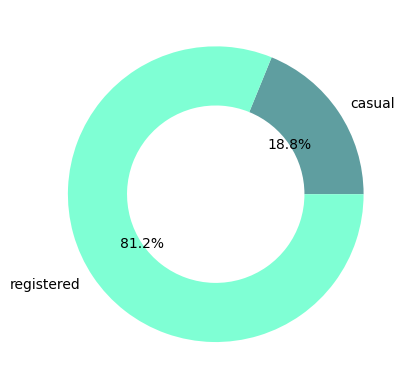

In [40]:
casreg_pie = hour_df[['casual', 'registered']].sum()
plt.pie(
    x=casreg_pie,
    labels=('casual', 'registered'),
    colors=('#5F9EA0', '#7FFFD4'),
    autopct='%1.1f%%',
    wedgeprops = {'width':0.4}
)
plt.show()

### Perbandingan Penggunaan Bike Sharing Pada Hari Kerja dan Bukan Hari Kerja

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12704\3976522852.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=wd_hour_df, x='workingday', y='total', palette='viridis')


Text(0, 0.5, '')

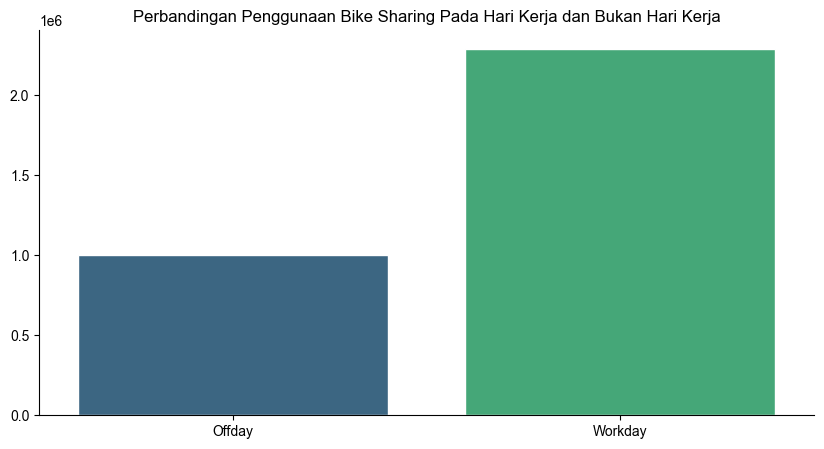

In [41]:
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)
sns.set_style('whitegrid')
sns.barplot(data=wd_hour_df, x='workingday', y='total', palette='viridis')
plt.title("Perbandingan Penggunaan Bike Sharing Pada Hari Kerja dan Bukan Hari Kerja")
plt.xlabel(None)
plt.ylabel(None)

### Waktu Jam Saat Penggunaan Bike Sharing Paling Tinggi dan Paling Rendah

- Penggunaan Bike Sharing Terbanyak dan Tersedikit Berdasarkan Waktu (Jam)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12704\1334353737.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hr_hour_df, x='total', y='hour', palette=colors, orient='h')


Text(0, 0.5, '')

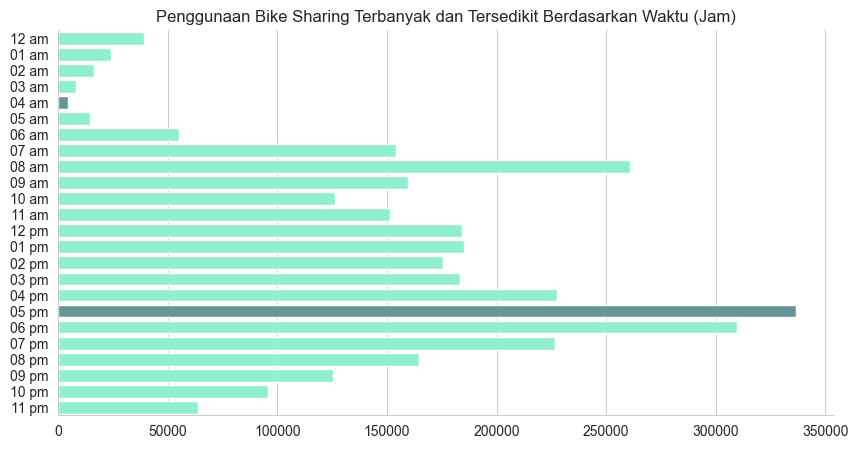

In [42]:
colors = ['#7FFFD4', '#7FFFD4', '#7FFFD4', '#7FFFD4', '#5F9EA0', '#7FFFD4', '#7FFFD4', '#7FFFD4', '#7FFFD4', '#7FFFD4', '#7FFFD4', '#7FFFD4', '#7FFFD4', '#7FFFD4', '#7FFFD4', '#7FFFD4', '#7FFFD4', '#5F9EA0', '#7FFFD4', '#7FFFD4', '#7FFFD4', '#7FFFD4', '#7FFFD4', '#7FFFD4']
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)
sns.set_style('whitegrid')
sns.barplot(data=hr_hour_df, x='total', y='hour', palette=colors, orient='h')
plt.title('Penggunaan Bike Sharing Terbanyak dan Tersedikit Berdasarkan Waktu (Jam)')
plt.xlabel(None)
plt.ylabel(None)

- Penggunaan Bike Sharing Berdasarkan Season Dengan Distribusi Waktu (Jam)

Text(0, 0.5, '')

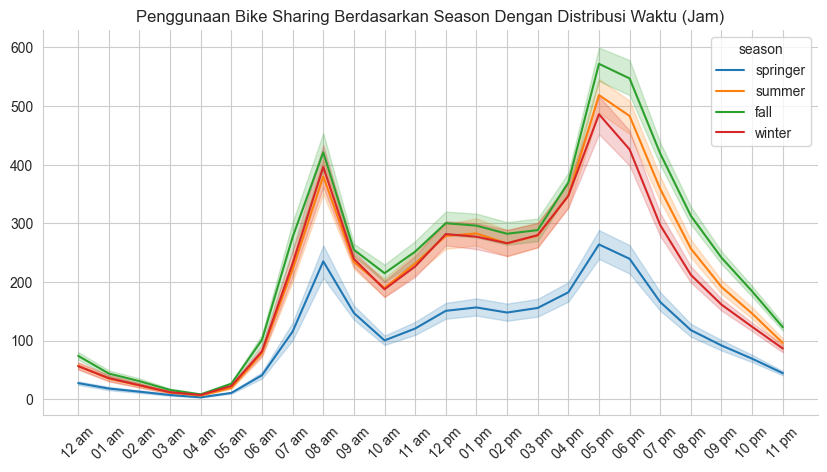

In [43]:
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)
sns.set_style('whitegrid')
sns.lineplot(x='hour', y='total', data=hour_df[['hour', 'season', 'total']], hue='season')
plt.xticks(rotation=45)
plt.title('Penggunaan Bike Sharing Berdasarkan Season Dengan Distribusi Waktu (Jam)')
plt.xlabel(None)
plt.ylabel(None)

- Penggunaan Bike Sharing Berdasarkan Weather Dengan Distribusi Waktu (Jam)

Text(0, 0.5, '')

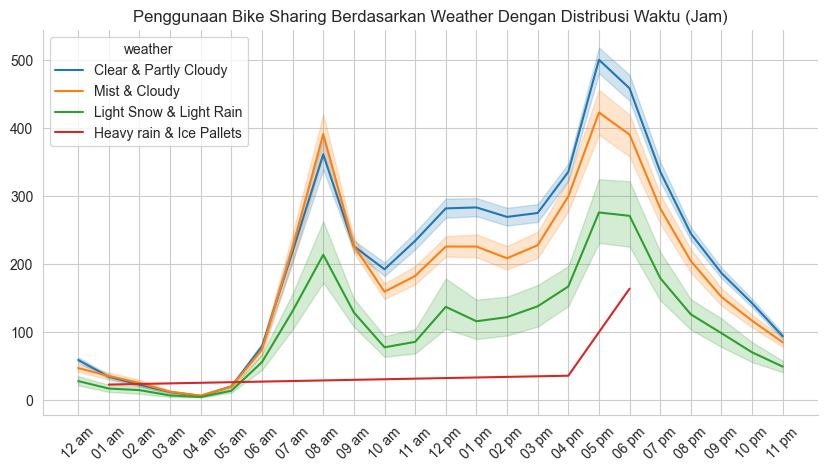

In [44]:
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)
sns.set_style('whitegrid')
sns.lineplot(x='hour', y='total', data=hour_df[['hour', 'weather', 'total']], hue='weather')
plt.xticks(rotation=45)
plt.title('Penggunaan Bike Sharing Berdasarkan Weather Dengan Distribusi Waktu (Jam)')
plt.xlabel(None)
plt.ylabel(None)

- Penggunaan Bike Sharing Berdasarkan Workingday Dengan Distribusi Waktu (Jam)

Text(0, 0.5, '')

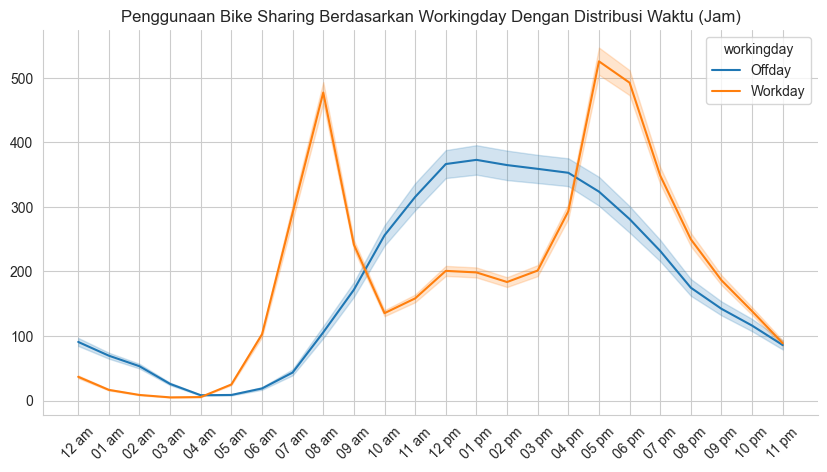

In [45]:
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)
sns.set_style('whitegrid')
sns.lineplot(x='hour', y='total', data=hour_df[['hour', 'workingday', 'total']], hue='workingday')
plt.xticks(rotation=45)
plt.title('Penggunaan Bike Sharing Berdasarkan Workingday Dengan Distribusi Waktu (Jam)')
plt.xlabel(None)
plt.ylabel(None)

### Perbandingan Penggunaan Bike Sharing Pada 4 Musim yang Berbeda

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12704\2047518059.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sea_hour_df, x='season', y='total', palette='viridis')


Text(0, 0.5, '')

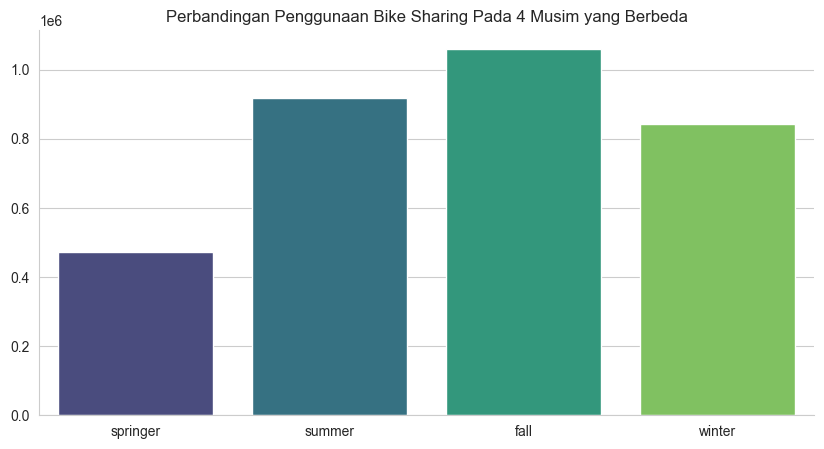

In [46]:
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)
sns.set_style('whitegrid')
sns.barplot(data=sea_hour_df, x='season', y='total', palette='viridis')
plt.title("Perbandingan Penggunaan Bike Sharing Pada 4 Musim yang Berbeda")
plt.xlabel(None)
plt.ylabel(None)

### Perbandingan Penggunaan Bike Sharing pada 4 Tipe Cuaca yang Berbeda

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12704\4145272417.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weat_hour_df, x='weather', y='total', palette='viridis')


Text(0, 0.5, '')

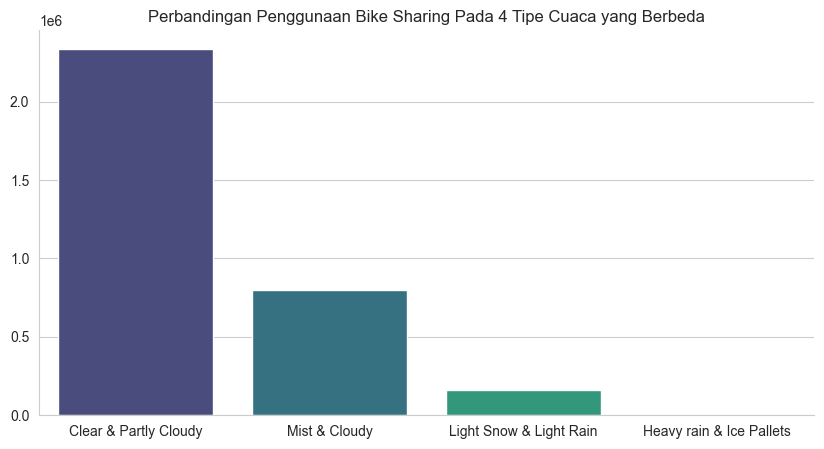

In [47]:
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)
sns.set_style('whitegrid')
sns.barplot(data=weat_hour_df, x='weather', y='total', palette='viridis')
plt.title("Perbandingan Penggunaan Bike Sharing Pada 4 Tipe Cuaca yang Berbeda")
plt.xlabel(None)
plt.ylabel(None)

### Checking Outliers

Text(0, 0.5, '')

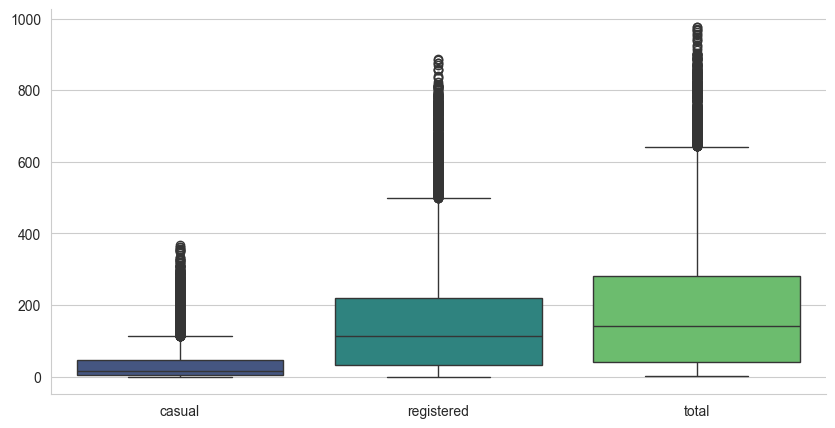

In [48]:
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)
sns.set_style('whitegrid')
sns.boxplot(data=hour_df[['casual', 'registered', 'total']], palette='viridis')
plt.xlabel(None)
plt.ylabel(None)

## Conclusion

- Pengguna registered lebih banyak daripada pengguna casual (81.2 % vs 18.8 %)
- Terdapat lebih banyak pengguna Bike Sharing pada saat hari kerja dibandingkan dengan bukan hari kerja
- Jam 05 pm merupakan waktu dengan pengguna Bike Sharing terbanyak, sedangkan jam 04 am merupakan waktu dengan pengguna Bike Sharing tersedikit
- Pada saat hari kerja, jam 05 pm merupakan waktu dengan pengguna Bike Sharing terbanyak
- Pada saat bukan hari kerja, jam 01 pm merupakan waktu dengan pengguna Bike Sharing terbanyak
- Fall season merupakan waktu dengan pengguna Bike Sharing terbanyak, sedangkan springer season merupakan waktu dengan pengguna Bike Sharing tersedikit
- Cuaca cerah merupakan waktu dengan pengguna Bike Sharing terbanyak, sedangkan cuaca hujan deras merupakan waktu dengan pengguna Bike Sharing
  tersedikit

## Save Cleaned hour_df Data to Use for Dashboard

In [50]:
hour_df.to_csv("main_data.csv", index=False)